In [10]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# NEW!
from sklearn.model_selection import train_test_split

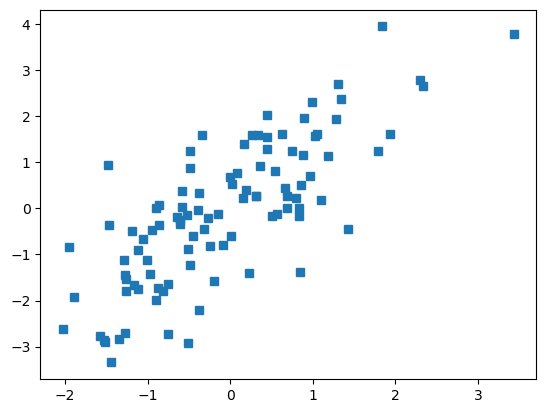

In [11]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [12]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

In [13]:
# model meta-parameters

learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [14]:
xTrain, xTest, yTrain, yTest = \
                        train_test_split(x, y, test_size=.2)

In [15]:
print(xTrain.shape)
print(xTest.shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [16]:
numepochs = 500
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(xTrain)

  # compute loss
  loss = lossfun(yHat,yTrain)

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [17]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(xTest)
testloss = (predYtest-yTest).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.04
Final TEST loss: 0.77


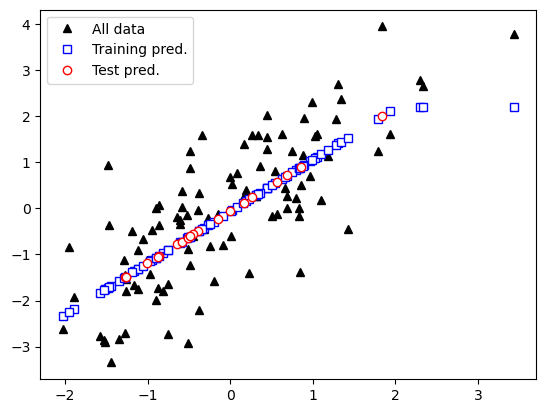

In [18]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(xTrain).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(xTrain, predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(xTest,predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()